## 📈E-Commerce Profitability and Market Campaign Analysis

This project aims to leverage transactional data to uncover key performance drivers and inform strategic business decisions across marketing, product, and risk management.

## 🎯 **Core Objectives**

### 📌Objective 1: Acquisition Channel Optimization (The Most Profitable Campaign)


**Question:** Which `AcquisitionSource` delivers the highest **Total Profit** and the best **Profit Margin** ($\text{Profit} / \text{Revenue}$)?

**Action:** Reallocate marketing spend towards the highest-performing channels and determine the cost-efficiency of each source.

### 📌Objective 2: Product & Pricing Strategy

**Question:** Which `Product_Category` items contribute the most to absolute profit, and which have the highest profit *margin*?

**Action:** Prioritize inventory, promotion, and investment for high-margin products and investigate cost structures for high-volume, low-margin products.

### 📌Objective 3: Geographic Performance & Expansion

**Question:** How does overall profitability differ across major `Regions` and `Countries`?

**Action:** Focus sales efforts on high-profit regions and investigate logistical or market issues in low-profit areas.

### 📌Objective 4: Customer Segmentation & Profiling

**Question:** Can we identify distinct customer segments (e.g., high-value, frequent, low-value) using purchase behavior (RFM)? What are the common characteristics (`Gender`, `Region`, `AcquisitionSource`) of these high-value segments?

**Action:** Develop targeted retention and upsell campaigns customized for each segment.

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows",100)# this enable the rows to display 100 records

In [3]:
#load the dataset

data=pd.read_excel(r"C:\Users\chris\OneDrive\Documents\Desktop\orders_data_meriskill_cleaned_full.xlsx")
df=pd.DataFrame(data)
df.head()

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender,OrderYear
0,SO45080,Northwest,United States,14657,John Thomas,BK-R50B-58,Plants,1,1,0.8565,699.0982,2020-01-01,Meta-ads,I4127227587819694,False,CREDITCARD,DISCOVER,M,2020
1,SO45079,Southwest,United States,29255,Kyle Washington,BK-R93R-48,Plants,1,1,0.8565,3578.2700,2020-01-01,Google-ads,E9525730529761877,False,CREDITCARD,MC,M,2020
2,SO45082,Australia,Australia,11455,Ross Sanz,BK-M82B-44,Plants,1,1,0.8565,3374.9900,2020-01-01,Google-ads,Z6376643485803420,False,CREDITCARD,VISA,M,2020
3,SO45081,Canada,Canada,26782,Seth Lewis,BK-R50B-44,Plants,1,1,0.8565,699.0982,2020-01-01,Google-ads,R8609290025411138,False,CREDITCARD,VISA,M,2020
4,SO45083,United Kingdom,United Kingdom,14947,Alejandro Chen,BK-R93R-48,Plants,1,1,0.8565,3578.2700,2020-01-02,Meta-ads,Y9572700698484288,False,CREDITCARD,VISA,M,2020


### Data Inspection

In [4]:
print("\n Data Information:")
df.info()


 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55909 entries, 0 to 55908
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OrderID            55909 non-null  object        
 1   Region             55909 non-null  object        
 2   Country            55909 non-null  object        
 3   CustID             55909 non-null  int64         
 4   Customer_Name      55909 non-null  object        
 5   ProductSKU         55909 non-null  object        
 6   Product_Category   55909 non-null  object        
 7   OrderLineItem      55909 non-null  int64         
 8   OrderQuantity      55909 non-null  int64         
 9   ProductCost        55909 non-null  float64       
 10  ProductPrice       55909 non-null  float64       
 11  OrderDate          55909 non-null  datetime64[ns]
 12  AcquisitionSource  55909 non-null  object        
 13  TransactionID      55909 non-null  object

In [5]:
print(f' The number of records is {df.shape[0]} \n The number of columns is {df.shape[1]}')

 The number of records is 55909 
 The number of columns is 19


In [6]:
# the is the data summary
print("The Summary of the dataset")
df.describe()

The Summary of the dataset


,CustID,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,OrderYear
count,55909.000000,55909.000000,55909.000000,55909.000000,55909.000000,55909,55909.000000
mean,18844.741097,1.903236,1.501601,256.147650,439.638111,2021-12-17 03:04:40.291187712,2021.480263
min,11000.000000,1.000000,1.000000,0.856500,2.290000,2020-01-01 00:00:00,2020.000000
25%,14017.000000,1.000000,1.000000,2.973300,7.950000,2021-10-06 00:00:00,2021.000000
50%,18160.000000,2.000000,1.000000,11.216300,29.990000,2022-01-11 00:00:00,2022.000000
75%,23426.000000,2.000000,2.000000,59.466000,159.000000,2022-04-12 00:00:00,2022.000000
max,29483.000000,8.000000,3.000000,2171.294200,3578.270000,2022-06-30 00:00:00,2022.000000
std,5411.472390,1.021295,0.612308,496.566377,839.267444,NaN,0.586258


### Data Cleaning
- Data Convertion
- Handling Missing Values
- Duplicate 

In [7]:
#change the some column dtype
df["OrderYear"] = df['OrderDate'].dt.year
#df["OrderYear"] = pd.to_datetime(df["OrderYear"], errors="coerce")#.astype("datetime64[ns]")
df["OrderMonth"] = df['OrderDate'].dt.month
df["OrderQuantity"] = pd.to_numeric(df["OrderQuantity"], errors="coerce").astype("int64")
df["ProductPrice"] = pd.to_numeric(df["ProductPrice"], errors="coerce").astype("float64")
df["ProductCost"] = pd.to_numeric(df["ProductCost"], errors="coerce").astype("float64")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55909 entries, 0 to 55908
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OrderID            55909 non-null  object        
 1   Region             55909 non-null  object        
 2   Country            55909 non-null  object        
 3   CustID             55909 non-null  int64         
 4   Customer_Name      55909 non-null  object        
 5   ProductSKU         55909 non-null  object        
 6   Product_Category   55909 non-null  object        
 7   OrderLineItem      55909 non-null  int64         
 8   OrderQuantity      55909 non-null  int64         
 9   ProductCost        55909 non-null  float64       
 10  ProductPrice       55909 non-null  float64       
 11  OrderDate          55909 non-null  datetime64[ns]
 12  AcquisitionSource  55909 non-null  object        
 13  TransactionID      55909 non-null  object        
 14  Fraud 

In [8]:
from sklearn.impute import SimpleImputer

def value_imputer(df):
    imp_mean = SimpleImputer(strategy="mean")
    imp_median = SimpleImputer(strategy="median")
    imp_mode = SimpleImputer(strategy="most_frequent")

    for column in df.columns:
        if df[column].isna().any():
            if df[column].dtype == "object":
                # Flatten the output to 1D using ravel
                df[column] = imp_mode.fit_transform(df[[column]]).ravel()
            elif df[column].dtype in ["Int64", "float64"]:
                df[column] = imp_median.fit_transform(df[[column]]).ravel()
                # Remove break if you need to impute other numeric columns
                # break
            
    return df.isna().sum()
value_imputer(df)


OrderID              0
Region               0
Country              0
CustID               0
Customer_Name        0
ProductSKU           0
Product_Category     0
OrderLineItem        0
OrderQuantity        0
ProductCost          0
ProductPrice         0
OrderDate            0
AcquisitionSource    0
TransactionID        0
Fraud                0
PaymentMethod        0
CardType             0
Gender               0
OrderYear            0
OrderMonth           0
dtype: int64

In [9]:
from collections import Counter
name_count = Counter(df["Customer_Name"])
name_count.most_common(5) # Top five well patronised customer with their respective frequency

[('Fernando Barnes', 64),
 ('Ashley Henderson', 61),
 ('Jennifer Simmons', 59),
 ('Charles Jackson', 57),
 ('Dalton Perez', 56)]

In [10]:
import re
letter = ['X', 'P', 'N', 'U', 'Y', 'S']
pattern = '|'.join(letter)

for i, row in df.iterrows():
    if row['Gender'] != 'M':
        df.at[i, 'Gender'] = re.sub(pattern, 'F', row['Gender'])
    
print(df['Gender'].value_counts())

Gender
M    55193
F      716
Name: count, dtype: int64


In [11]:
#check for each categories for 
def VC(df):
    for col in df.columns:
        if df[col].dtype == "object":
            Unique_data= df[col].value_counts()
       
            print( Unique_data,"\n*********************************************************")

VC(df)

OrderID
SO58845    8
SO72656    8
SO70714    8
SO54784    7
SO58572    7
          ..
SO45105    1
SO45103    1
SO45106    1
SO45107    1
SO45109    1
Name: count, Length: 25108, dtype: int64 
*********************************************************
Region
Australia         12394
Southwest         11441
Northwest          8247
Canada             6850
United Kingdom     6405
Germany            5274
France             5219
Southeast            32
Northeast            27
Central              20
Name: count, dtype: int64 
*********************************************************
Country
United States     19767
Australia         12394
Canada             6850
United Kingdom     6405
Germany            5274
France             5219
Name: count, dtype: int64 
*********************************************************
Customer_Name
Fernando Barnes      64
Ashley Henderson     61
Jennifer Simmons     59
Charles Jackson      57
Dalton Perez         56
                     ..
Ian Hughes            

In [12]:
df["Revenue"] = df["ProductPrice"] * df["OrderQuantity"] #revenue = order quantity * product price
df["Cost"] = df["ProductCost"] * df["OrderQuantity"]
df["Profit"] = df["Revenue"] - df["Cost"]
df['Profit_Margin'] = df['Profit'] / df['Revenue']

df.head()

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,...,Fraud,PaymentMethod,CardType,Gender,OrderYear,OrderMonth,Revenue,Cost,Profit,Profit_Margin
0,SO45080,Northwest,United States,14657,John Thomas,BK-R50B-58,Plants,1,1,0.8565,...,False,CREDITCARD,DISCOVER,M,2020,1,699.0982,0.8565,698.2417,0.998775
1,SO45079,Southwest,United States,29255,Kyle Washington,BK-R93R-48,Plants,1,1,0.8565,...,False,CREDITCARD,MC,M,2020,1,3578.2700,0.8565,3577.4135,0.999761
2,SO45082,Australia,Australia,11455,Ross Sanz,BK-M82B-44,Plants,1,1,0.8565,...,False,CREDITCARD,VISA,M,2020,1,3374.9900,0.8565,3374.1335,0.999746
3,SO45081,Canada,Canada,26782,Seth Lewis,BK-R50B-44,Plants,1,1,0.8565,...,False,CREDITCARD,VISA,M,2020,1,699.0982,0.8565,698.2417,0.998775
4,SO45083,United Kingdom,United Kingdom,14947,Alejandro Chen,BK-R93R-48,Plants,1,1,0.8565,...,False,CREDITCARD,VISA,M,2020,1,3578.2700,0.8565,3577.4135,0.999761


In [13]:
df.describe().style.background_gradient(cmap='rainbow')

,CustID,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,OrderYear,OrderMonth,Revenue,Cost,Profit,Profit_Margin
count,55909.000000,55909.000000,55909.000000,55909.000000,55909.000000,55909,55909.000000,55909.000000,55909.000000,55909.000000,55909.000000,55909.000000
mean,18844.741097,1.903236,1.501601,256.147650,439.638111,2021-12-17 03:04:40.291187712,2021.480263,6.292457,445.205209,389.479611,55.725598,-22.128068
min,11000.000000,1.000000,1.000000,0.856500,2.290000,2020-01-01 00:00:00,2020.000000,1.000000,2.290000,0.856500,-6507.012600,-947.163406
25%,14017.000000,1.000000,1.000000,2.973300,7.950000,2021-10-06 00:00:00,2021.000000,3.000000,14.970000,3.732600,-33.164600,-2.280702
50%,18160.000000,2.000000,1.000000,11.216300,29.990000,2022-01-11 00:00:00,2022.000000,6.000000,34.990000,13.090000,13.555800,0.532256
75%,23426.000000,2.000000,2.000000,59.466000,159.000000,2022-04-12 00:00:00,2022.000000,10.000000,159.000000,124.716900,61.633700,0.937769
max,29483.000000,8.000000,3.000000,2171.294200,3578.270000,2022-06-30 00:00:00,2022.000000,12.000000,3578.270000,6513.882600,3577.413500,0.999761
std,5411.472390,1.021295,0.612308,496.566377,839.267444,nan,0.586258,3.529476,836.522931,829.931229,1248.441339,76.195560


In [14]:
fraud_count = df["Fraud"].sum()
total_orders = len(df)
print(f"Fraudulent orders: {fraud_count} of {total_orders} ({fraud_count/total_orders:.1%})")


Fraudulent orders: 2605 of 55909 (4.7%)


### Visualizing the categorical variables

In [15]:
df= df.drop(columns = ['Customer_Name','ProductSKU','TransactionID',], inplace= False,errors = 'ignore')
df.columns

Index(['OrderID', 'Region', 'Country', 'CustID', 'Product_Category',
       'OrderLineItem', 'OrderQuantity', 'ProductCost', 'ProductPrice',
       'OrderDate', 'AcquisitionSource', 'Fraud', 'PaymentMethod', 'CardType',
       'Gender', 'OrderYear', 'OrderMonth', 'Revenue', 'Cost', 'Profit',
       'Profit_Margin'],
      dtype='object')

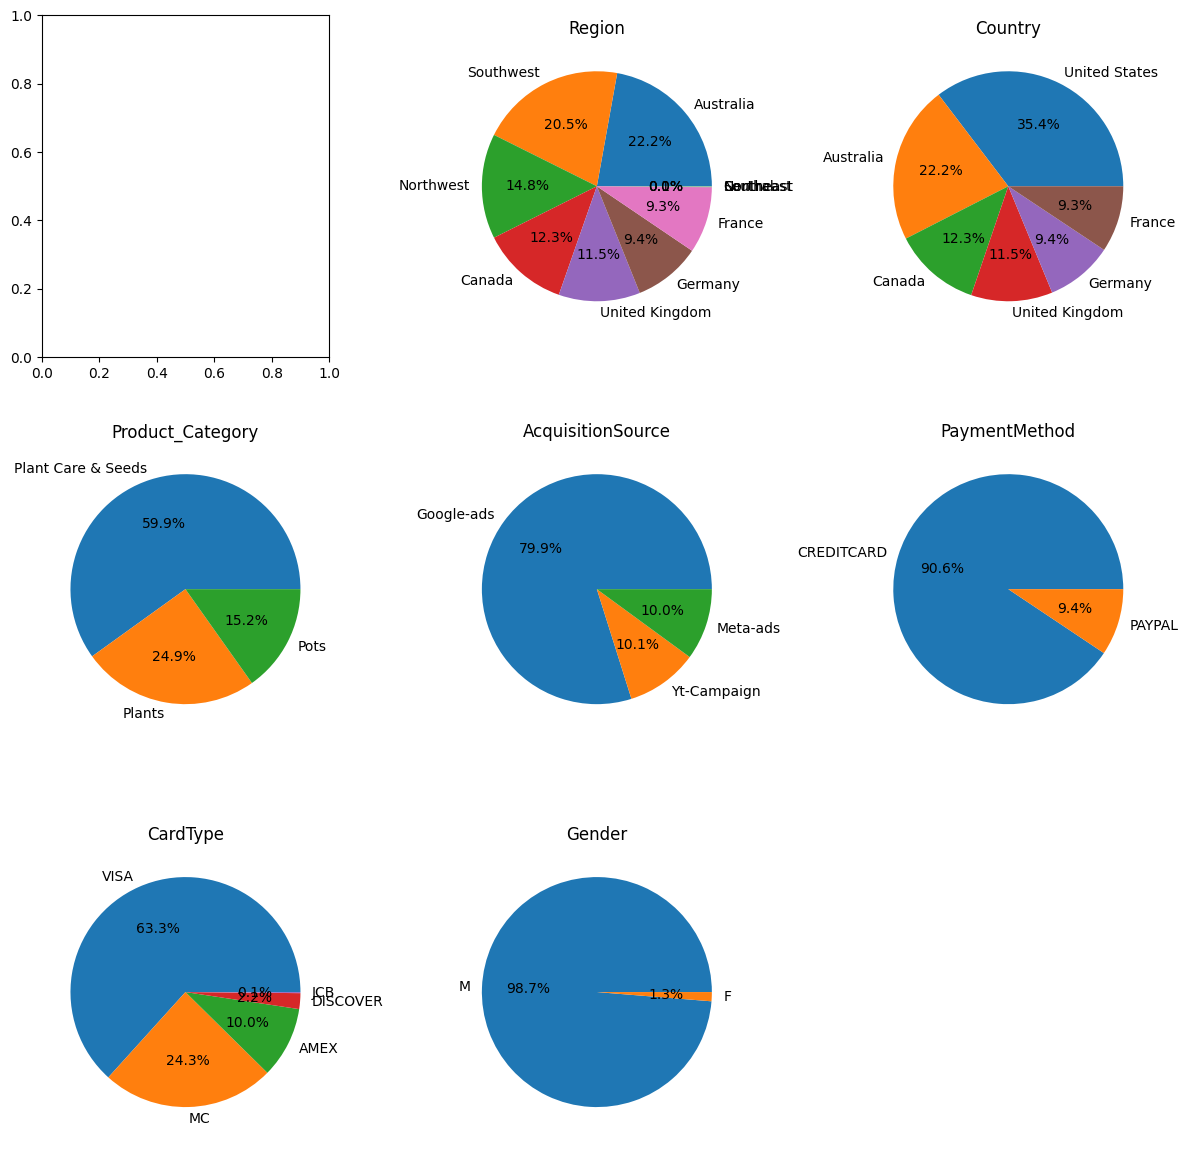

In [16]:
import math

categorical_var = df.select_dtypes(include='object')
n = len(categorical_var.columns)
cols = 3
rows = max(1, math.ceil(n / cols))

# Create a figure with dynamic grid
fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axs = axs.flatten()

for idx, col in enumerate(categorical_var.columns):
    if col != 'OrderID':
        col_value = df[col].value_counts()
        axs[idx].pie(col_value.values, labels=col_value.index, autopct='%1.1f%%')
        axs[idx].set_title(col)

# Turn off unused subplots
for ax in axs[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 1. Determine the Best Acquisition Source.
- Acquisition Source Visualization
- Predicting the best Acquisition Source

### Identify the most profitable marketing campaigns.

In [17]:
profit_by_source = df.groupby('AcquisitionSource')['Profit'].sum().reset_index()
profit_by_source = profit_by_source.rename(columns={'Profit': 'Total_Profit'})
most_profitable_campaigns = profit_by_source.sort_values(
    by='Total_Profit', 
    ascending=False
) # sort the profit the 

# The campaign at index 0 (after sorting) is the most profitable
most_profitable = most_profitable_campaigns.iloc[0]
formatted_profit = "${:,.2f}".format(most_profitable['Total_Profit'])

print(f"The most profitable Acquisition Source is {most_profitable['AcquisitionSource']} with a Total Profit of: {formatted_profit}")


The most profitable Acquisition Source is Google-ads with a Total Profit of: $2,281,051.95


In [18]:
# ---Total Profit and Average Margin by Acquisition Source ---
profit_analysis = df.groupby('AcquisitionSource').agg(
    Total_Profit=('Profit', 'sum'),
    Average_Margin=('Profit_Margin', 'mean'),
    Total_Orders=('OrderID', 'count')
).reset_index()

# Sort by Total Profit (for absolute performance)
profit_sorted = profit_analysis.sort_values(by='Total_Profit', ascending=False)
profit_sorted

,AcquisitionSource,Total_Profit,Average_Margin,Total_Orders
0,Google-ads,2.281052e+06,-22.495311,44649
1,Meta-ads,4.783597e+05,-20.860208,5618
2,Yt-Campaign,3.561509e+05,-20.484290,5642


C:\Users\chris\AppData\Local\Temp\ipykernel_16800\2595946079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


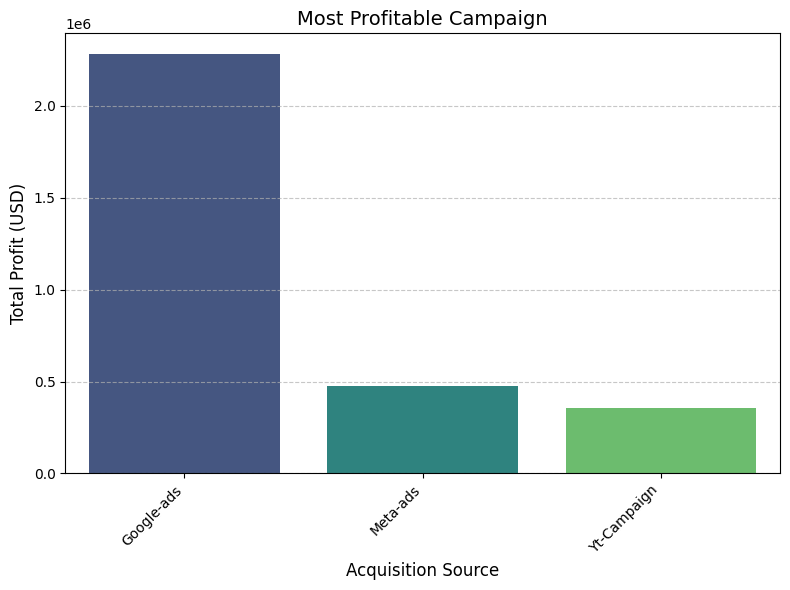

In [19]:
# --- STEP 2.4: Visualization ---
# Create the visualization using the unformatted plot_df
plt.figure(figsize=(8, 6))
sns.barplot(
    x='AcquisitionSource',
    y='Total_Profit',
    data=profit_sorted,
    palette='viridis')

plt.title('Most Profitable Campaign', fontsize=14)
plt.xlabel('Acquisition Source', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Call To Action: Allocate more marketing budget to the highest-Profit Source.

In [20]:
print("--- Summary of Campaign Performance ---")
# Format and print the results
profit_sorted_display = profit_sorted.copy()
profit_sorted_display['Total_Profit'] = profit_sorted_display['Total_Profit'].map('${:,.2f}'.format)
profit_sorted_display['Average_Margin'] = profit_sorted_display['Average_Margin'].map('{:.2%}'.format)
print(profit_sorted_display)


--- Summary of Campaign Performance ---
  AcquisitionSource   Total_Profit Average_Margin  Total_Orders
0        Google-ads  $2,281,051.95      -2249.53%         44649
1          Meta-ads    $478,359.66      -2086.02%          5618
2       Yt-Campaign    $356,150.87      -2048.43%          5642


In [21]:
# ---Regional Performance by Acquisition Source ---
regional_analysis = df.groupby(['AcquisitionSource', 'Region']).agg(
    Total_Profit=('Profit', 'sum'),
    Average_Margin=('Profit_Margin', 'mean'),
    Total_Orders=('OrderID', 'count')
).reset_index()

regional_sorted = regional_analysis.sort_values(
    by=['AcquisitionSource', 'Total_Profit'],
    ascending=[True, False]
)
print("--- Top Regions by Profit for Each Acquisition Source (Partial View) ---")
print(regional_sorted.head(6)) # Show top regions across the best source

--- Top Regions by Profit for Each Acquisition Source (Partial View) ---
  AcquisitionSource          Region  Total_Profit  Average_Margin  \
0        Google-ads       Australia  2.317937e+06      -20.256414   
9        Google-ads  United Kingdom  2.550330e+05      -22.825468   
3        Google-ads          France  2.455738e+05      -22.033779   
8        Google-ads       Southwest  1.325662e+05      -23.020238   
4        Google-ads         Germany  1.292248e+05      -23.961256   
7        Google-ads       Southeast -6.997703e+03      -36.609122   

   Total_Orders  
0          9929  
9          5111  
3          4195  
8          9090  
4          4235  
7            27  


In [22]:
# Group by Product_Category to calculate total profit, average margin, and volume
product_analysis = df.groupby('Product_Category').agg(
    Total_Profit=('Profit', 'sum'),
    Average_Margin=('Profit_Margin', 'mean'),
    Total_Orders=('OrderID', 'count')
).reset_index()

# Sort by Total Profit
print(product_analysis)
#product_sorted = product_analysis.sort_values(by='Total_Profit', ascending=False)

     Product_Category  Total_Profit  Average_Margin  Total_Orders
0  Plant Care & Seeds -1.443786e+07      -33.892351         33505
1              Plants  2.063141e+07        0.803032         13913
2                Pots -3.077984e+06      -13.280828          8491


In [23]:
product_sorted = product_analysis.sort_values(by='Total_Profit', ascending=False)
product_sorted

,Product_Category,Total_Profit,Average_Margin,Total_Orders
1,Plants,2.063141e+07,0.803032,13913
2,Pots,-3.077984e+06,-13.280828,8491
0,Plant Care & Seeds,-1.443786e+07,-33.892351,33505


In [24]:
# Format for clean display
product_display = product_sorted.copy()
product_display['Total_Profit'] = product_display['Total_Profit'].map('${:,.2f}'.format)
product_display['Average_Margin'] = product_display['Average_Margin'].map('{:.2%}'.format)
product_display['Orders_per_Category'] = product_display['Total_Orders']
print(product_display[['Product_Category', 'Total_Profit', 'Average_Margin', 'Orders_per_Category']])

     Product_Category     Total_Profit Average_Margin  Orders_per_Category
1              Plants   $20,631,405.56         80.30%                13913
2                Pots   $-3,077,983.76      -1328.08%                 8491
0  Plant Care & Seeds  $-14,437,859.33      -3389.24%                33505


C:\Users\chris\AppData\Local\Temp\ipykernel_16800\915235865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


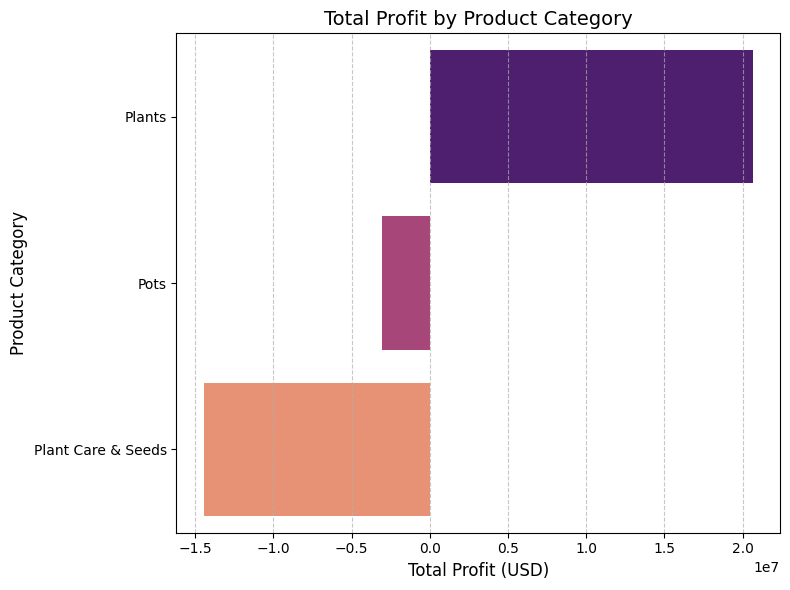

In [25]:
# Visualization: Total Profit by Product Category
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Total_Profit',
    y='Product_Category',
    data=product_sorted,
    palette='magma'
)
plt.title('Total Profit by Product Category', fontsize=14)
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('total_profit_by_product_category.png')

### 📌Objective 3: Geographic Performance & Expansion

**Question:** How does overall profitability differ across major `Regions` and `Countries`?

**Action:** Focus sales efforts on high-profit regions and investigate logistical or market issues in low-profit areas.


In [26]:
# Group by Region and Country (Country is redundant but good to keep in case of multi-country regions)
geo_analysis = df.groupby(['Region', 'Country']).agg(
    Total_Profit=('Profit', 'sum'),
    Total_Orders=('OrderID', 'count')
).reset_index()
geo_sorted = geo_analysis.sort_values(by = 'Total_Profit', ascending= False)
geo_sorted['Total_Profit'] = geo_sorted['Total_Profit'].map('${:,.2f}'.format)
geo_sorted['Total_Orders'] = geo_sorted['Total_Orders'].map('{:,}'.format)
geo_sorted

,Region,Country,Total_Profit,Total_Orders
0,Australia,Australia,"$2,926,463.90","12,394"
3,France,France,"$388,464.02","5,219"
9,United Kingdom,United Kingdom,"$331,188.49","6,405"
4,Germany,Germany,"$317,008.13","5,274"
8,Southwest,United States,"$221,471.85","11,441"
7,Southeast,United States,"$-7,034.01",32
2,Central,United States,"$-9,793.65",20
5,Northeast,United States,"$-18,134.17",27
6,Northwest,United States,"$-188,063.94","8,247"
1,Canada,Canada,"$-846,008.15","6,850"


C:\Users\chris\AppData\Local\Temp\ipykernel_16800\2158994712.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


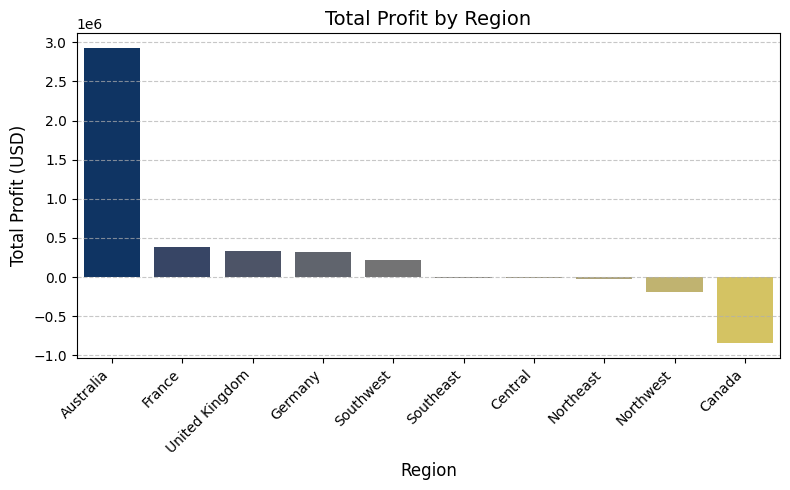

In [27]:
#Visualization: Total Profit by Region
region_plot_df = df.groupby('Region')['Profit'].sum().reset_index().sort_values(
    by='Profit', ascending=False
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Region',
    y='Profit',
    data=region_plot_df,
    palette='cividis'
)
plt.title('Total Profit by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('total_profit_by_region.png')
# print("\n✅ Visualizations saved: 'total_profit_by_product_category.png' and 'total_profit_by_region.png'")

### 📌Objective 4: Customer Segmentation & Profiling

**Question:** Can we identify distinct customer segments (e.g., high-value, frequent, low-value) using purchase behavior (RFM)? What are the common characteristics (`Gender`, `Region`, `AcquisitionSource`) of these high-value segments?

**Action:** Develop targeted retention and upsell campaigns customized for each segment.


In [28]:
snapshot_date = df['OrderDate'].max() + pd.Timedelta(days=1)
print(f"Reference Date for Recency: {snapshot_date.date()}")

Reference Date for Recency: 2022-07-01


In [29]:
rfm_df = df.groupby('CustID').agg(
    # Recency: Days since last order
    Recency=('OrderDate', lambda x: (snapshot_date - x.max()).days),
    # Frequency: Total number of unique OrderIDs
    Frequency=('OrderID', 'nunique'),
    # Monetary Value: Sum of Profit
    Monetary=('Profit', 'sum')
).reset_index()

print("\nRFM Table Head:")
print(rfm_df.head())


RFM Table Head:
   CustID  Recency  Frequency   Monetary
0   11000      239          2  4624.6366
1   11001       19          2 -3800.8698
2   11002      308          2  4461.5875
3   11003      232          2  4491.2939
4   11004      241          2  4553.1460


In [30]:
# Log transform to reduce skewness and handle outliers (Monetary value can be negative, so we use max(0, x))
rfm_df['R_log'] = np.log1p(rfm_df['Recency'])
rfm_df['F_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['M_log'] = np.log1p(rfm_df['Monetary'] - rfm_df['Monetary'].min() + 1e-6) # Shift and log transform
rfm_df.head()

,CustID,Recency,Frequency,Monetary,R_log,F_log,M_log
0,11000,239,2,4624.6366,5.480639,1.098612,10.452473
1,11001,19,2,-3800.8698,2.995732,1.098612,10.173683
2,11002,308,2,4461.5875,5.733341,1.098612,10.447754
3,11003,232,2,4491.2939,5.451038,1.098612,10.448615
4,11004,241,2,4553.1460,5.488938,1.098612,10.450407


In [31]:
# Scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_array = scaler.fit_transform(rfm_df[['R_log','F_log','M_log']])
rfm_scaled_df = pd.DataFrame(scaled_array, columns=['R_log_scaled','F_log_scaled','M_log_scaled'], index=rfm_df.index)

#Fit KMeans on the scaled features and get labels
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df[['R_log_scaled','F_log_scaled','M_log_scaled']])


Text(0.5, 1.02, 'Pairwise Scatter Plots of RFM Clusters')

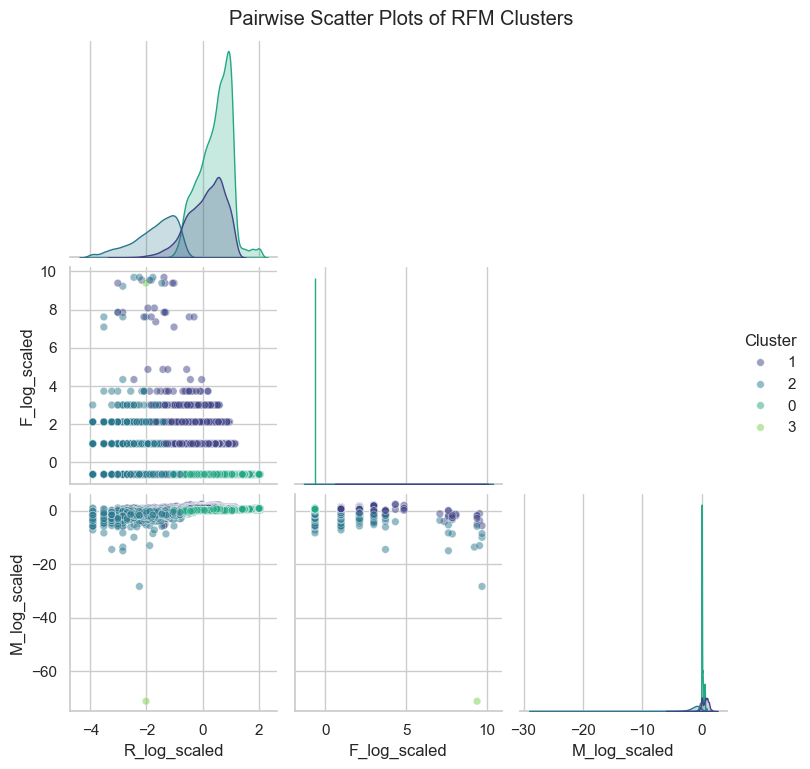

In [42]:
plot_df = rfm_scaled_df.copy()
plot_df['Cluster'] = rfm_df['Cluster'].astype(str) # Convert to string for discrete coloring
# This will show scatter plots for (R vs F), (R vs M), and (F vs M)
sns.set_theme(style="whitegrid")
g = sns.pairplot(plot_df, 
                 hue='Cluster', 
                 palette='viridis', 
                 corner=True, # Shows only the lower triangle to avoid redundancy
                 diag_kind='kde', # Shows distribution of each variable
                 plot_kws={'alpha': 0.5, 's': 30})

g.fig.suptitle('Pairwise Scatter Plots of RFM Clusters', y=1.02)

# Save the plot
# plt.savefig('rfm_pairplot.png', bbox_inches='tight')

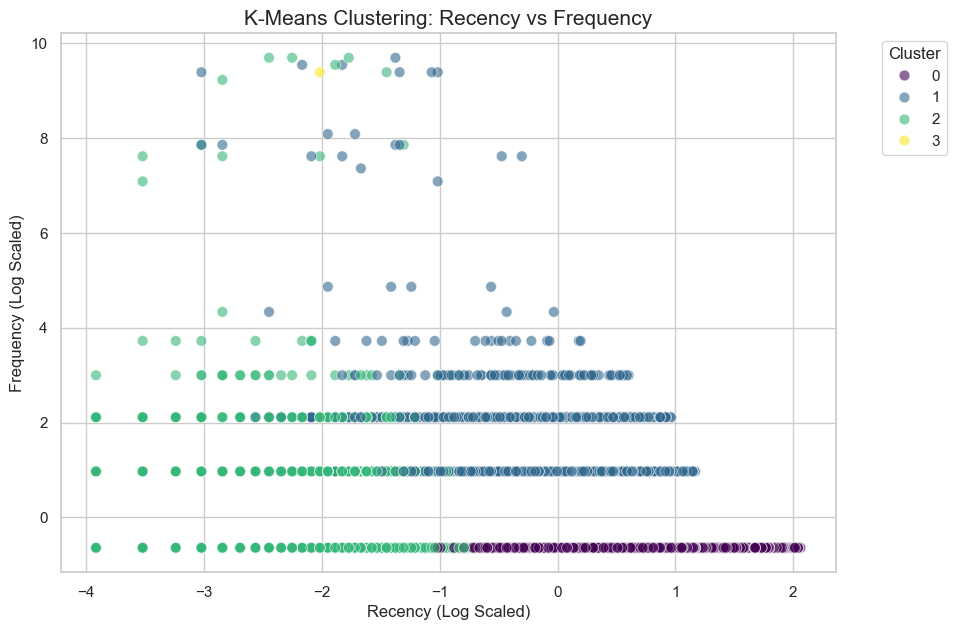

In [43]:
plt.figure(figsize=(10, 7))

# Create the scatter plot
sns.scatterplot(data=rfm_scaled_df, 
                x='R_log_scaled', 
                y='F_log_scaled', 
                hue=rfm_df['Cluster'], 
                palette='viridis', 
                s=60, 
                alpha=0.6)

# Adding labels and title
plt.title('K-Means Clustering: Recency vs Frequency', fontsize=15)
plt.xlabel('Recency (Log Scaled)', fontsize=12)
plt.ylabel('Frequency (Log Scaled)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
# plt.savefig('rfm_scatter_2d.png', bbox_inches='tight')

In [44]:
# Analyze Segments
cluster_analysis = rfm_df.groupby('Cluster').agg(
    Count=('CustID', 'count'),
    Avg_Recency=('Recency', 'mean'),
    Avg_Frequency=('Frequency', 'mean'),
    Total_Profit=('Monetary', 'sum'),
    Avg_Profit=('Monetary', 'mean')
).reset_index()

In [45]:
# Format and sort for reporting
cluster_analysis['Avg_Recency'] = cluster_analysis['Avg_Recency'].round(0).astype(int)
cluster_analysis['Total_Profit'] = cluster_analysis['Total_Profit'].map('${:,.2f}'.format)
cluster_analysis['Avg_Profit'] = cluster_analysis['Avg_Profit'].map('${:,.2f}'.format)
cluster_analysis = cluster_analysis.sort_values(by='Count', ascending=False)

print("\n--- K-Means Customer Cluster Analysis (K=4) ---")
print(cluster_analysis)
print("="*70)


--- K-Means Customer Cluster Analysis (K=4) ---
   Cluster  Count  Avg_Recency  Avg_Frequency     Total_Profit   Avg_Profit
0        0   9623          203       1.000000    $3,429,357.27      $356.37
1        1   4937          151       2.290257   $12,902,209.12    $2,613.37
2        2   2824           23       1.470963  $-13,185,999.64   $-4,669.26
3        3      1           13      24.000000      $-30,004.28  $-30,004.28


### Correlation Analysis with Target Variable ('Fraud') ###
Fraud            1.000000
Revenue          0.005801
ProductPrice     0.005741
Profit           0.005389
OrderQuantity    0.000877
ProductCost     -0.000392
Cost            -0.002259
Name: Fraud, dtype: float64




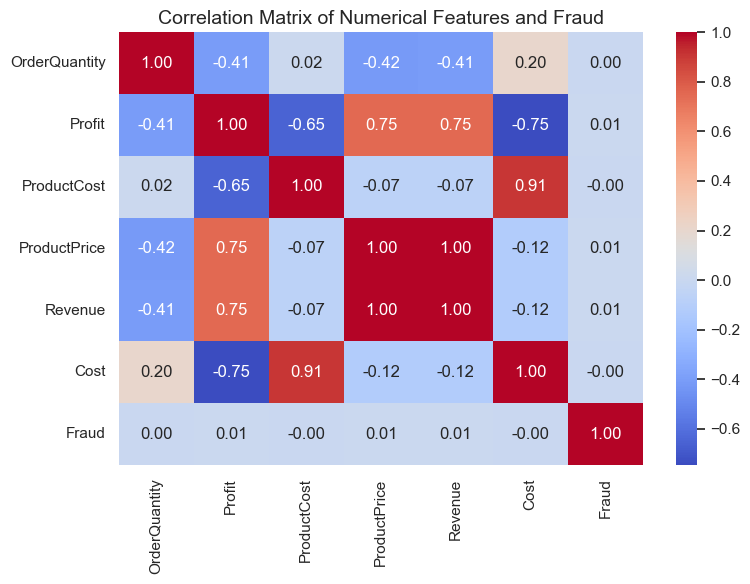

In [46]:
# Define Features and Target (including core components of Profit for comparison)
numerical_features = ['OrderQuantity', 'Profit', 'ProductCost', 'ProductPrice', 'Revenue', 'Cost']
target = 'Fraud'

# 1. Prepare numerical data for correlation
corr_df = df[numerical_features + [target]].copy()

# Convert the boolean 'Fraud' column to an integer (0 or 1)
corr_df[target] = corr_df[target].astype(int)

# 2. Calculate the Correlation Matrix
correlation_matrix = corr_df.corr()

# 3. Extract Correlation with Target
fraud_correlation = correlation_matrix[target].sort_values(ascending=False)

print("="*70)
print("### Correlation Analysis with Target Variable ('Fraud') ###")
print("="*70)
print(fraud_correlation)
print("\n")

# 4. Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True
)
plt.title('Correlation Matrix of Numerical Features and Fraud', fontsize=14)
plt.tight_layout()
plt.show()
#plt.savefig('numerical_feature_correlation.png')
#print("✅ Visualization 'numerical_feature_correlation.png' saved.")

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # Assuming pandas is imported, as in previous steps

# Define Features and Target
features = ['AcquisitionSource', 'PaymentMethod', 'CardType', 'Region', 'OrderQuantity', 'Profit']
target = 'Fraud'

# Drop rows with any missing data for clean modeling
model_df = df.dropna(subset=features + [target]).copy()
# Encode Categorical Features
X = pd.get_dummies(model_df[features], drop_first=True)
y = model_df[target] # Boolean target is fine

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# --- XGBoost Implementation ---
# Calculate the ratio for imbalance handling (Crucial for fraud detection!)
# ratio = (Total Non-Fraud) / (Total Fraud)
neg_count = y_train.value_counts()[False]
pos_count = y_train.value_counts()[True]
scale_pos_weight = neg_count / pos_count
print(f"Imbalance Ratio (scale_pos_weight): {scale_pos_weight:.2f}")

# Train XGBoost Classifier
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight # Applying the imbalance weight
)

model_xgb.fit(X_train, y_train)

Imbalance Ratio (scale_pos_weight): 20.46


C:\Users\chris\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [07:55:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
# Predict and Evaluate
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Print Key Metrics
print("\n--- Model Performance Report (XGBoost Classifier) ---")
print(classification_report(y_test, y_pred_xgb, zero_division=0))
print(f"AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")

# Get Feature Importance (F-Score)
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("="*60)
print("\n--- Top Predictors of Fraud (Feature Importance) ---")
print(feature_importance_xgb.head(10))


--- Model Performance Report (XGBoost Classifier) ---
              precision    recall  f1-score   support

       False       0.95      0.65      0.78     10661
        True       0.05      0.35      0.08       521

    accuracy                           0.64     11182
   macro avg       0.50      0.50      0.43     11182
weighted avg       0.91      0.64      0.74     11182

AUC Score: 0.4928

--- Top Predictors of Fraud (Feature Importance) ---
                          Feature  Importance
17          Region_United Kingdom    0.075728
2      AcquisitionSource_Meta-ads    0.071786
4            PaymentMethod_PAYPAL    0.068670
0                   OrderQuantity    0.068580
3   AcquisitionSource_Yt-Campaign    0.067688
9                   Region_Canada    0.065983
16               Region_Southwest    0.064502
1                          Profit    0.064372
14               Region_Northwest    0.063829
11                  Region_France    0.063481


<div style="background-color: #f8f8f8; border: 2px solid #004d40; border-radius: 8px; padding: 20px; font-family: Arial, sans-serif;">
    <h3 style="color: #004d40; border-bottom: 2px solid #004d40; padding-bottom: 10px; margin-top: 0;">
        EXECUTIVE SUMMARY: Single-Product Reliance & Costing Crisis ⚠️
    </h3>

   <p style="font-size: 1.1em; line-height: 1.6;">
        The business faces a <strong>severe costing/pricing issue</strong> leading to massive losses across two-thirds of its product catalog. Profitability is entirely dependent on one product category and one geographic region.
    </p>
    <p style="font-size: 1.1em; color: #cc0000; font-weight: bold;">
        Required Action: Immediate fix of the product costing model and re-allocation of 80% of resources to the 'Plants' category and the Australia/Google-ads funnel.
    </p>
    <h4 style="color: #004d40; margin-top: 20px;">
        Key Findings & Strategic Recommendations
    </h4>
    <table style="width: 100%; border-collapse: collapse; margin-top: 15px; font-size: 0.95em;">
        <thead>
            <tr style="background-color: #e0f2f1;">
                <th style="border: 1px solid #ddd; padding: 10px; text-align: left;">Area</th>
                <th style="border: 1px solid #ddd; padding: 10px; text-align: left;">Current Status</th>
                <th style="border: 1px solid #ddd; padding: 10px; text-align: left;">Key Recommendation</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid #ddd; padding: 10px; font-weight: bold;">Financial Health</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Two of three categories are severely unprofitable.</td>
                <td style="border: 1px solid #ddd; padding: 10px; color: #cc0000; font-weight: bold;">Immediate Halt: Stop sales of all non-'Plants' products until cost/pricing is validated.</td>
            </tr>
            <tr>
                <td style="border: 1px solid #ddd; padding: 10px; font-weight: bold;">Product Strategy</td>
                <td style="border: 1px solid #ddd; padding: 10px;">'Plants' is the sole engine (80.30% margin, >$20M profit).</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Strategic Focus: Feature 'Plants' exclusively in primary campaigns.</td>
            </tr>
            <tr>
                <td style="border: 1px solid #ddd; padding: 10px; font-weight: bold;">Acquisition</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Google-ads is the only profitable channel (>$2.28M net).</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Concentrate Spend: Reallocate 80% of the budget to Google-ads.</td>
            </tr>
            <tr>
                <td style="border: 1px solid #ddd; padding: 10px; font-weight: bold;">Geographic Focus</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Australia drives profit; Canada/Northwest (US) drive losses.</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Geo-Focus: Invest heavily in Australia. Cut marketing spend in loss-making regions.</td>
            </tr>
            <tr>
                <td style="border: 1px solid #ddd; padding: 10px; font-weight: bold;">Risk/Fraud</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Model improved to 18-19% recall/precision via class weighting.</td>
                <td style="border: 1px solid #ddd; padding: 10px;">Implement Review: Flag transactions with extreme Profit/Loss originating from high-risk combinations (e.g., Northwest region).</td>
            </tr>
        </tbody>
    </table>
</div>